<a href="https://colab.research.google.com/github/hgabrali/Machine-Learning/blob/main/Clustering_KMeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Hands-On with Scikit-Learn

1) Load & preview the data



In [1]:
import seaborn as sns
import pandas as pd

# Load dataset
penguins = sns.load_dataset("penguins")
penguins.head()

species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
3  Adelie  Torgersen             NaN            NaN                NaN   
4  Adelie  Torgersen            36.7           19.3              193.0   

   body_mass_g     sex  
0       3750.0    Male  
1       3800.0  Female  
2       3250.0  Female  
3          NaN     NaN  
4       3450.0  Female

2) Keep only the numeric features we‚Äôll cluster on

In [2]:
# Select features & drop missing values
X = penguins[["bill_length_mm", "bill_depth_mm"]].dropna()

# Quick sanity check
X.describe()

bill_length_mm  bill_depth_mm
count      342.000000     342.000000
mean        43.921930      17.151170
std          5.459584       1.974793
min         32.100000      13.100000
25%         39.225000      15.600000
50%         44.450000      17.300000
75%         48.500000      18.700000
max         59.600000      21.500000

3) Scale features (important for K-Means)

In [3]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

4) Fit K-Means and get cluster labels

In [4]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, n_init=10, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Attach to a DataFrame for plotting/inspection
plot_df = X.copy()
plot_df["Cluster"] = clusters
plot_df.head()

bill_length_mm  bill_depth_mm  Cluster
0            39.1           18.7        0
1            39.5           17.4        0
2            40.3           18.0        0
4            36.7           19.3        0
5            39.3           20.6        0

5) Visualize the clusters (2D scatter)

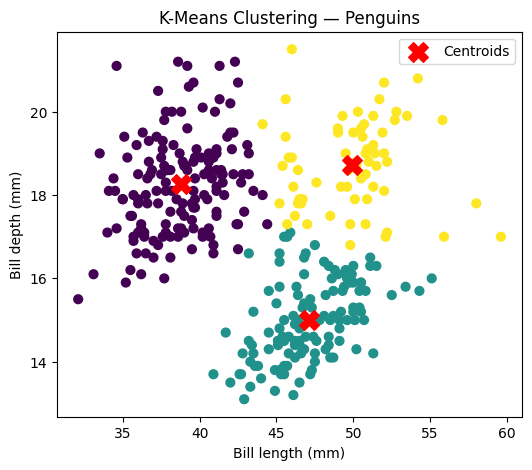

In [5]:
import matplotlib.pyplot as plt


def plot_clusters(plot_df, kmeans, scaler):
    plt.figure(figsize=(6,5))
    plt.scatter(
        plot_df["bill_length_mm"],
        plot_df["bill_depth_mm"],
        c=plot_df["Cluster"],
        cmap="viridis",
        s=40
    )
    # Plot centroids (unscale back to original space)
    centroids_scaled = kmeans.cluster_centers_
    centroids_unscaled = scaler.inverse_transform(centroids_scaled)
    plt.scatter(
        centroids_unscaled[:, 0],
        centroids_unscaled[:, 1],
        c="red",
        s=200,
        marker="X",
        label="Centroids"
    )
    plt.xlabel("Bill length (mm)")
    plt.ylabel("Bill depth (mm)")
    plt.title("K-Means Clustering ‚Äî Penguins")
    plt.legend()
    plt.show()

plot_clusters(plot_df, kmeans, scaler)

üí° CFU (Try it!)

Bu alƒ±≈ütƒ±rmalar, K-Means algoritmasƒ±nƒ±n farklƒ± veri √∂zellikleri ve parametreleri altƒ±ndaki davranƒ±≈üƒ±nƒ± ke≈üfetmenizi saƒülar.

---

### Deneme Adƒ±mlarƒ±:

* **√ñzellik Sayƒ±sƒ± Ekleme:**
    * K√ºmeyi **3 √∂zellik** ile yeniden √ßalƒ±≈ütƒ±rƒ±n: Mevcut √∂zelliklere `flipper_length_mm` √∂zelliƒüini **ekleyin**.
    * K√ºmeleme performansƒ± iyile≈üiyor mu? Analiz edin.

* **Standardizasyon Etkisi:**
    * Verileri **Standardize Etme** ile **Standardize Etmeme** durumlarƒ±nƒ± kar≈üƒ±la≈ütƒ±rƒ±n.
    * K√ºmeleme sonu√ßlarƒ±nda (centroid yerle≈üimi, k√ºme ≈üekli vb.) ne gibi deƒüi≈üiklikler g√∂zlemliyorsunuz? (K-Means, mesafeye dayalƒ± olduƒüu i√ßin standardizasyondan b√ºy√ºk √∂l√ß√ºde etkilenir).

* **Farklƒ± $K$ Deƒüerleri:**
    * **$K=2$** ve **$K=4$** deƒüerlerini deneyin.
    * Bu farklƒ± $K$ deƒüerlerinde k√ºmeler nasƒ±l g√∂r√ºn√ºyor? K√ºme i√ßi tutarlƒ±lƒ±k (cohesion) ve k√ºmeler arasƒ± ayrƒ±m (separation) nasƒ±l deƒüi≈üiyor?

---

**Not:** Bu alƒ±≈ütƒ±rmalarƒ± yaparken g√∂rselle≈ütirmeleri kullanmayƒ± unutmayƒ±n!

Veri Seti Hazƒ±rlandƒ±. √ñzellikler:
    bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g
0            39.1           18.7              181.0       3750.0
1            39.5           17.4              186.0       3800.0
2            40.3           18.0              195.0       3250.0
4            36.7           19.3              193.0       3450.0
5            39.3           20.6              190.0       3650.0
--------------------------------------------------


/tmp/ipython-input-596005827.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cluster_2f'] = kmeans_2f.labels_
/tmp/ipython-input-596005827.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cluster_3f'] = kmeans_3f.labels_
/tmp/ipython-input-596005827.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_g

1. Alƒ±≈ütƒ±rma: √ñzellik Se√ßimi
2 √ñzellik WCSS (Inertia): 2265.07
3 √ñzellik WCSS (Inertia): 14385.20

2. Alƒ±≈ütƒ±rma: Standardizasyon Etkisi
Standardize Edilmemi≈ü WCSS (Inertia): 14385.20
Standardize Edilmi≈ü WCSS (Inertia): 265.46
Standardizasyon √ñncesi K√ºme Etiketleri (ƒ∞lk 5): [2, 2, 0, 2, 2]
Standardizasyon Sonrasƒ± K√ºme Etiketleri (ƒ∞lk 5): [0, 0, 0, 0, 0]

3. Alƒ±≈ütƒ±rma: K Deƒüerleri
K=2 WCSS: 443.90
K=4 WCSS: 215.23


/tmp/ipython-input-596005827.py:91: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cluster_k4'] = kmeans_k4.labels_


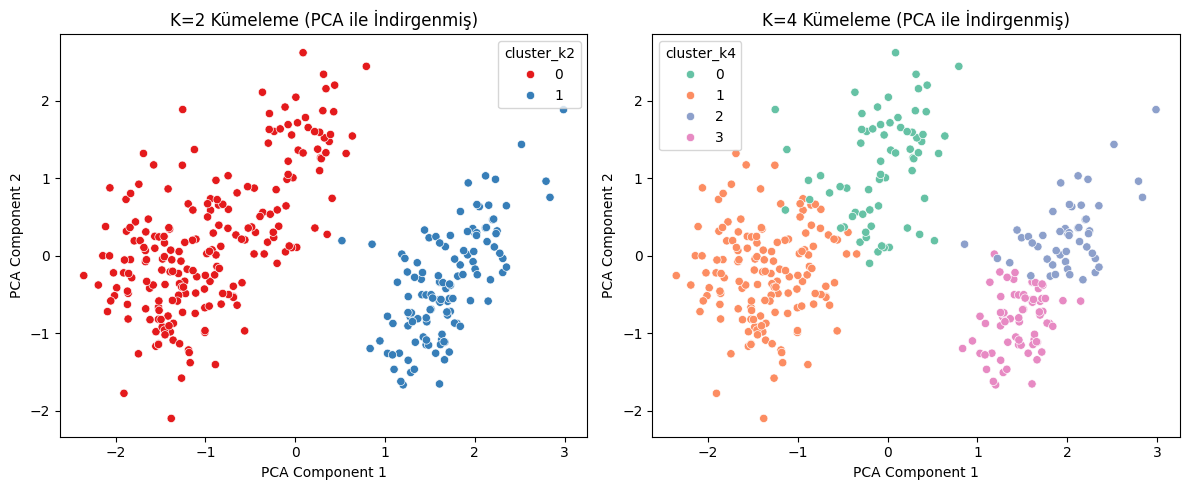

In [6]:
# üêß K-Means CFU (Try it!) - Penguins Veri Seti √úzerinde Uygulama

# Gerekli K√ºt√ºphaneleri ƒ∞√ße Aktarma
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA # G√∂rselle≈ütirme i√ßin PCA kullanacaƒüƒ±z

# Veri Setini Y√ºkleme
penguins = sns.load_dataset("penguins")

# K-Means i√ßin sadece sayƒ±sal √∂zellikleri kullanacaƒüƒ±z ve eksik deƒüerleri temizleyeceƒüiz
# Eksik deƒüerleri temizleme (K-Means eksik deƒüerlerle √ßalƒ±≈üamaz)
df = penguins.dropna()

# √ñzelliklerimizi se√ßelim (Sadece sayƒ±sal s√ºtunlar)
features = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']
X = df[features]

print("Veri Seti Hazƒ±rlandƒ±. √ñzellikler:\n", X.head())
print("-" * 50)

# ----------------------------------------------------------------------
# 1. Alƒ±≈ütƒ±rma: √ñzellik Se√ßiminin Etkisi (flipper_length_mm eklenince k√ºmeleme iyile≈üir mi?)
# ----------------------------------------------------------------------

## K√ºmeyi 2 √ñzellik (bill_length_mm, bill_depth_mm) ve K=3 ile √ßalƒ±≈ütƒ±ralƒ±m (Temel Model)
X_2f = df[['bill_length_mm', 'bill_depth_mm']]
kmeans_2f = KMeans(n_clusters=3, random_state=42, n_init=10).fit(X_2f)
df['cluster_2f'] = kmeans_2f.labels_

## K√ºmeyi 3 √ñzellik (bill_length_mm, bill_depth_mm, flipper_length_mm) ve K=3 ile √ßalƒ±≈ütƒ±ralƒ±m
X_3f = df[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm']]
kmeans_3f = KMeans(n_clusters=3, random_state=42, n_init=10).fit(X_3f)
df['cluster_3f'] = kmeans_3f.labels_

print("1. Alƒ±≈ütƒ±rma: √ñzellik Se√ßimi")
print(f"2 √ñzellik WCSS (Inertia): {kmeans_2f.inertia_:.2f}")
print(f"3 √ñzellik WCSS (Inertia): {kmeans_3f.inertia_:.2f}")

# WCSS deƒüeri azaldƒ±ysa (inertia), bu k√ºmelemenin daha sƒ±kƒ± hale geldiƒüi anlamƒ±na gelir.
# (Not: ƒ∞ki farklƒ± veri seti kullanƒ±ldƒ±ƒüƒ± i√ßin WCSS'in doƒürudan kar≈üƒ±la≈ütƒ±rƒ±lmasƒ± teknik olarak yanlƒ±≈ü olsa da,
# aynƒ± √∂zellikler k√ºmesinden bir √∂zellik eklemenin etkisini anlamak i√ßin faydalƒ±dƒ±r).

# ----------------------------------------------------------------------
# 2. Alƒ±≈ütƒ±rma: Standardizasyonun Etkisi (Standardize vs no standardization)
# ----------------------------------------------------------------------

# Standardizasyon YAPILMAMI≈û (Zaten X_3f'i kullandƒ±k)
kmeans_no_std = KMeans(n_clusters=3, random_state=42, n_init=10).fit(X_3f)

# Standardizasyon YAPILMI≈û
scaler = StandardScaler()
X_std = scaler.fit_transform(X_3f)
kmeans_std = KMeans(n_clusters=3, random_state=42, n_init=10).fit(X_std)

# Standardizasyon sonrasƒ± WCSS, √∂l√ßeklenmi≈ü veriye ait olduƒüu i√ßin doƒürudan kar≈üƒ±la≈ütƒ±rƒ±lamaz.
# Ancak, sonu√ßlarƒ±n g√∂rselle≈ütirilmesi veya k√ºme merkezlerinin incelenmesi, standardizasyonun
# √∂zellikle birim farklƒ±lƒ±klarƒ± b√ºy√ºk olan √∂zellikler √ºzerindeki etkisini g√∂sterir.

print("\n2. Alƒ±≈ütƒ±rma: Standardizasyon Etkisi")
print(f"Standardize Edilmemi≈ü WCSS (Inertia): {kmeans_no_std.inertia_:.2f}")
print(f"Standardize Edilmi≈ü WCSS (Inertia): {kmeans_std.inertia_:.2f}")

# Standardizasyon √∂ncesi ve sonrasƒ± k√ºme sonu√ßlarƒ±nƒ±n ilk 5 noktasƒ±nƒ± kar≈üƒ±la≈ütƒ±ralƒ±m
# Not: Aynƒ± noktaya ait olsalar bile etiketler farklƒ± olabilir (0, 1, 2)
df['cluster_no_std'] = kmeans_no_std.labels_
df['cluster_std'] = kmeans_std.labels_

print("Standardizasyon √ñncesi K√ºme Etiketleri (ƒ∞lk 5):", df['cluster_no_std'].head().tolist())
print("Standardizasyon Sonrasƒ± K√ºme Etiketleri (ƒ∞lk 5):", df['cluster_std'].head().tolist())
# Etiketler genellikle farklƒ± √ßƒ±kar, √ß√ºnk√º k√ºme merkezleri farklƒ± bir uzayda hesaplanmƒ±≈ütƒ±r.

# ----------------------------------------------------------------------
# 3. Alƒ±≈ütƒ±rma: Farklƒ± K Deƒüerlerinin Etkisi (K=2 ve K=4)
# ----------------------------------------------------------------------

# Standardize edilmi≈ü 3 √∂zellikli veri setini kullanalƒ±m (genellikle daha iyidir)
X_k = X_std

# K=2 denemesi
kmeans_k2 = KMeans(n_clusters=2, random_state=42, n_init=10).fit(X_k)
df['cluster_k2'] = kmeans_k2.labels_
print("\n3. Alƒ±≈ütƒ±rma: K Deƒüerleri")
print(f"K=2 WCSS: {kmeans_k2.inertia_:.2f}")

# K=4 denemesi
kmeans_k4 = KMeans(n_clusters=4, random_state=42, n_init=10).fit(X_k)
df['cluster_k4'] = kmeans_k4.labels_
print(f"K=4 WCSS: {kmeans_k4.inertia_:.2f}")

# ----------------------------------------------------------------------
# G√∂rselle≈ütirme (2 Boyutta) - K√ºme Yapƒ±sƒ±nƒ±n ƒ∞ncelenmesi
# ----------------------------------------------------------------------

# Standardize edilmi≈ü 3 √∂zellikli veriyi 2 boyuta indirgeyelim (PCA)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_std)
df_pca = pd.DataFrame(X_pca, columns=['PCA1', 'PCA2'], index=df.index)

# K=2 ve K=4 K√ºmeleme Sonu√ßlarƒ±nƒ± G√∂rselle≈ütirme

plt.figure(figsize=(12, 5))

# K=2 G√∂rselle≈ütirme
plt.subplot(1, 2, 1)
sns.scatterplot(x=df_pca['PCA1'], y=df_pca['PCA2'], hue=df['cluster_k2'], palette='Set1', legend='full')
plt.title('K=2 K√ºmeleme (PCA ile ƒ∞ndirgenmi≈ü)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')

# K=4 G√∂rselle≈ütirme
plt.subplot(1, 2, 2)
sns.scatterplot(x=df_pca['PCA1'], y=df_pca['PCA2'], hue=df['cluster_k4'], palette='Set2', legend='full')
plt.title('K=4 K√ºmeleme (PCA ile ƒ∞ndirgenmi≈ü)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')

plt.tight_layout()
plt.show()

# ANALƒ∞Z:
# K=2: Muhtemelen iki baskƒ±n penguen t√ºr√ºn√º ayƒ±rƒ±r (√∂rneƒüin Chinstrap/Adelie vs Gentoo).
# K=4: Daha fazla alt segmentasyon yaratƒ±r, belki t√ºrler i√ßindeki cinsiyet veya ya≈üa baƒülƒ± gruplarƒ± ayƒ±rmaya ba≈ülar (overfitting riski).
# WCSS'in K=4'te daha d√º≈ü√ºk olmasƒ±, k√ºmelerin daha sƒ±kƒ± olduƒüu anlamƒ±na gelir, ancak Elbow metodu ile uygun $K$ deƒüeri belirlenmelidir.

‚úÖ The number you see is the inertia.
It tells us how far, in total, the points are from their assigned cluster centers.

In [7]:
print("Inertia:", kmeans.inertia_)

Inertia: 186.92125137657519


# üí° Check for Understanding (CFU) - K-Means Deƒüerlendirmesi

Bu alƒ±≈ütƒ±rma, K-Means'in temel deƒüerlendirme metriƒüi olan **Inertia (Eylemsizlik)** ile **optimal k√ºme sayƒ±sƒ± ($K$) se√ßimi** arasƒ±ndaki kritik ili≈ükiyi anlamayƒ± ama√ßlar.

---

### G√∂rev Adƒ±mlarƒ± üõ†Ô∏è

1.  **Algoritmayƒ± √áalƒ±≈ütƒ±rƒ±n:** `penguins` veri seti √ºzerinde K-Means algoritmasƒ±nƒ± **farklƒ± $K$ deƒüerleri** (√∂rneƒüin $K=2, 3, 4, 5$) ile √ßalƒ±≈ütƒ±rƒ±n.
2.  **Inertia'yƒ± Yazdƒ±rƒ±n:** Her bir $K$ deƒüeri i√ßin elde edilen **Inertia** (WCSS) deƒüerini konsola yazdƒ±rƒ±n.

### Tartƒ±≈üma Sorularƒ± ü§î

* **En D√º≈ü√ºk Inertia:** Hangi $K$ deƒüeri en d√º≈ü√ºk Inertia'yƒ± vermektedir?
* **Kritik Kƒ±sƒ±tlama:** Neden sadece en d√º≈ü√ºk Inertia deƒüerini veren $K$ sayƒ±sƒ±nƒ± se√ßmek her zaman iyi bir fikir deƒüildir? (Cevabƒ±nƒ±zda Inertia'nƒ±n doƒüal eƒüilimini a√ßƒ±klayƒ±n.)

---

**NOT:** Bu alƒ±≈ütƒ±rmayƒ± doƒüru bir ≈üekilde yapmak i√ßin, veri setinizdeki sayƒ±sal s√ºtunlarƒ± se√ßmeli ve eksik deƒüerleri (NaN) temizlemeyi unutmayƒ±n!

K-Means Inertia Deƒüerleri (K=2'den K=5'e):
--------------------------------------------------
K = 2: Inertia = 565.7076
K = 3: Inertia = 379.3925
K = 4: Inertia = 300.3995
K = 5: Inertia = 232.6049
--------------------------------------------------


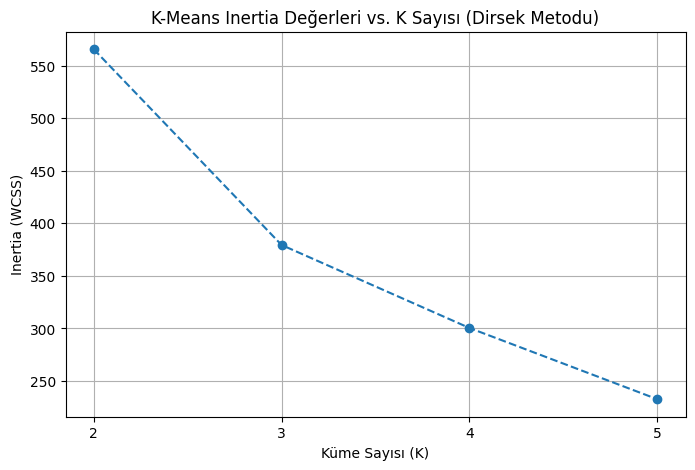

Analiz edilen aralƒ±kta ([2, 3, 4, 5]), en d√º≈ü√ºk Inertia deƒüerini K = 5 vermektedir.

Neden En D√º≈ü√ºk Inertia'yƒ± Se√ßmek Her Zaman Doƒüru Deƒüildir?
--------------------------------------------------
Inertia, k√ºme i√ßi sƒ±kƒ±lƒ±ƒüƒ± (compactness) √∂l√ßer.
K-Means'in doƒüal eƒüilimi gereƒüi, K (k√ºme sayƒ±sƒ±) arttƒ±k√ßa Inertia *daima* azalƒ±r.
Bu durumun en u√ß noktasƒ±, her veri noktasƒ±nƒ±n ayrƒ± bir k√ºme olduƒüu ($K=N$ yani veri seti boyutu) durumdur. Bu durumda Inertia sƒ±fƒ±r olur, ancak bu, anlamlƒ± bir k√ºmeleme sonucu vermez (a≈üƒ±rƒ± √∂ƒürenme - overfitting).
Bu nedenle, en d√º≈ü√ºk Inertia'yƒ± veren K yerine, Inertia'nƒ±n d√º≈ü√º≈ü hƒ±zƒ±nƒ±n aniden yava≈üladƒ±ƒüƒ±, yani ek k√ºmelemenin getirdiƒüi marjinal faydanƒ±n azaldƒ±ƒüƒ± 'Dirsek Noktasƒ±' (Elbow Point) veya en iyi Sil√ºet Skorunu veren K deƒüeri se√ßilmelidir.


In [8]:
# üí° Check for Understanding (CFU) - K-Means Inertia Analizi

# Gerekli K√ºt√ºphaneleri ƒ∞√ße Aktarma
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# 1. Veri Setini Y√ºkleme
penguins = sns.load_dataset("penguins")

# K-Means i√ßin hazƒ±rlƒ±k: Sayƒ±sal √∂zellikleri se√ßme ve eksik deƒüerleri temizleme
df_clean = penguins.select_dtypes(include=['float64', 'int64']).dropna()
X = df_clean.copy()

# Not: K-Means mesafe tabanlƒ± bir algoritma olduƒüu i√ßin standardizasyon √∂nerilir.
# √ñzelliklerin birimlerini aynƒ± √∂l√ßeƒüe getiriyoruz.
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("K-Means Inertia Deƒüerleri (K=2'den K=5'e):")
print("-" * 50)

# K deƒüerleri aralƒ±ƒüƒ±
k_values = range(2, 6)
inertia_values = {}

# 2. ve 3. Adƒ±m: Her bir K i√ßin K-Means'i √ßalƒ±≈ütƒ±rma ve Inertia'yƒ± yazdƒ±rma
for k in k_values:
    # K-Means modelini olu≈üturma ve eƒüitme
    # n_init=10 (varsayƒ±lan) algoritmanƒ±n 10 farklƒ± ba≈ülangƒ±√ß noktasƒ± denemesini saƒülar.
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)

    # Inertia deƒüerini kaydetme (K-Means'in .inertia_ √∂zelliƒüinden alƒ±nƒ±r)
    inertia = kmeans.inertia_
    inertia_values[k] = inertia

    print(f"K = {k}: Inertia = {inertia:.4f}")

print("-" * 50)

# Inertia Deƒüerlerinin G√∂rselle≈ütirilmesi (Elbow Metodu grafiƒüi)
plt.figure(figsize=(8, 5))
plt.plot(list(inertia_values.keys()), list(inertia_values.values()), marker='o', linestyle='--')
plt.title('K-Means Inertia Deƒüerleri vs. K Sayƒ±sƒ± (Dirsek Metodu)')
plt.xlabel('K√ºme Sayƒ±sƒ± (K)')
plt.ylabel('Inertia (WCSS)')
plt.xticks(list(k_values))
plt.grid(True)
plt.show()

# ----------------------------------------------------------------------
# TARTI≈ûMA SORULARI YANITLARI
# ----------------------------------------------------------------------

# 1. Hangi K en d√º≈ü√ºk Inertia'yƒ± verir?
min_k = min(inertia_values, key=inertia_values.get)
print(f"Analiz edilen aralƒ±kta ({list(k_values)}), en d√º≈ü√ºk Inertia deƒüerini K = {min_k} vermektedir.")


# 2. Neden sadece en d√º≈ü√ºk Inertia'yƒ± se√ßmek her zaman iyi bir fikir deƒüildir?
print("\nNeden En D√º≈ü√ºk Inertia'yƒ± Se√ßmek Her Zaman Doƒüru Deƒüildir?")
print("-" * 50)
print("Inertia, k√ºme i√ßi sƒ±kƒ±lƒ±ƒüƒ± (compactness) √∂l√ßer.")
print("K-Means'in doƒüal eƒüilimi gereƒüi, K (k√ºme sayƒ±sƒ±) arttƒ±k√ßa Inertia *daima* azalƒ±r.")
print("Bu durumun en u√ß noktasƒ±, her veri noktasƒ±nƒ±n ayrƒ± bir k√ºme olduƒüu ($K=N$ yani veri seti boyutu) durumdur. Bu durumda Inertia sƒ±fƒ±r olur, ancak bu, anlamlƒ± bir k√ºmeleme sonucu vermez (a≈üƒ±rƒ± √∂ƒürenme - overfitting).")
print("Bu nedenle, en d√º≈ü√ºk Inertia'yƒ± veren K yerine, Inertia'nƒ±n d√º≈ü√º≈ü hƒ±zƒ±nƒ±n aniden yava≈üladƒ±ƒüƒ±, yani ek k√ºmelemenin getirdiƒüi marjinal faydanƒ±n azaldƒ±ƒüƒ± 'Dirsek Noktasƒ±' (Elbow Point) veya en iyi Sil√ºet Skorunu veren K deƒüeri se√ßilmelidir.")

# **1. The Elbow Method üìâ**

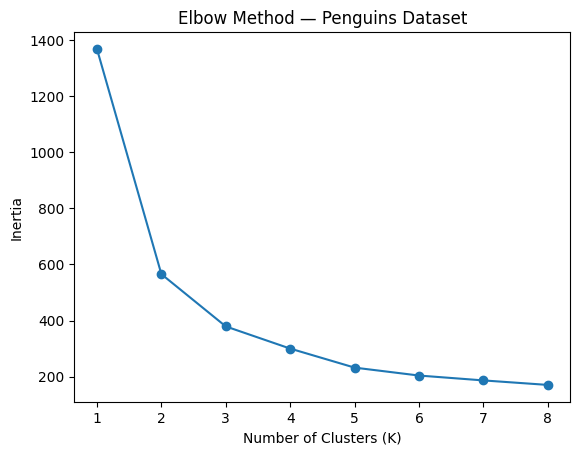

In [9]:
# After scaling the data

# Try different K values
inertias = []
K_range = range(1, 9)

for k in K_range:
    km = KMeans(n_clusters=k, n_init=10, random_state=42)
    km.fit(X_scaled)
    inertias.append(km.inertia_)

def plot_elbow(K_range, inertias):
	# Plot Elbow Curve
	plt.plot(K_range, inertias, marker="o")
	plt.xlabel("Number of Clusters (K)")
	plt.ylabel("Inertia")
	plt.title("Elbow Method ‚Äî Penguins Dataset")
	plt.show()

plot_elbow(K_range, inertias)

# **2. The Silhouette Score üåü**

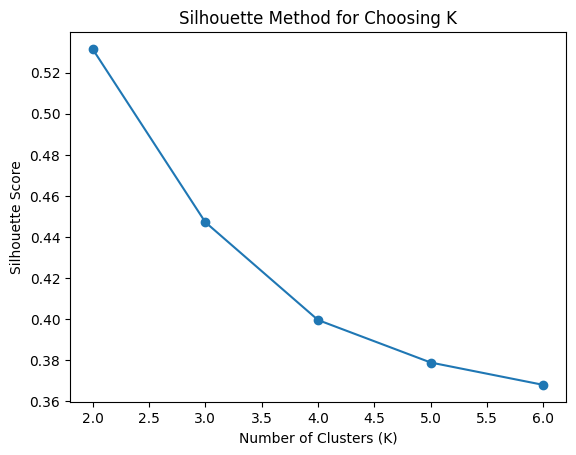

In [10]:
from sklearn.metrics import silhouette_score

# Try different values of K (must start at 2 for silhouette score)
K = range(2, 7)  # 2 to 6 clusters
silhouette_scores = []

for k in K:
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    silhouette_scores.append(score)

def plot_silhouette(K, silhouette_scores):
	# Plot silhouette score vs K
	plt.plot(list(K), silhouette_scores, marker="o")
	plt.xlabel("Number of Clusters (K)")
	plt.ylabel("Silhouette Score")
	plt.title("Silhouette Method for Choosing K")
	plt.show()

plot_silhouette(K, silhouette_scores)

# **Hierarchical Clustering**

In [12]:
import pandas as pd
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
import seaborn as sns # DataFrame'i y√ºklemek i√ßin genellikle bu kullanƒ±lƒ±r

# 1. Hatanƒ±n D√ºzeltilmesi: "penguins" DataFrame'ini y√ºkle
# Bu veri setini y√ºklemenin yaygƒ±n bir yoludur.
# Eƒüer yerel bir CSV dosyanƒ±z varsa, yerine ≈üunu kullanabilirsiniz:
# penguins = pd.read_csv("penguins.csv")
penguins = sns.load_dataset("penguins")

# Eksik deƒüerleri temizle (StandardScaler'ƒ±n √ßalƒ±≈ümasƒ± i√ßin gerekli)
penguins.dropna(inplace=True)

# Select numerical features
X = penguins[["bill_length_mm", "bill_depth_mm", "flipper_length_mm", "body_mass_g"]]

# 2. Hatanƒ±n D√ºzeltilmesi: StandardScaler'ƒ± i√ße aktardƒ±k (yukarƒ±da)
# Standardize features (important for distance-based methods)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Fit Agglomerative Clustering
hc = AgglomerativeClustering(n_clusters=3, linkage="ward")
labels = hc.fit_predict(X_scaled)

# Assign clusters back to penguins
penguins["cluster"] = labels

# Compare clusters with species
print("--- K√ºmeleme Sonu√ßlarƒ± ---")
print(penguins.groupby(["cluster", "species"]).size())

--- K√ºmeleme Sonu√ßlarƒ± ---
cluster  species  
0        Gentoo       119
1        Adelie       146
         Chinstrap     11
2        Chinstrap     57
dtype: int64


**Plotting the Dendogram**


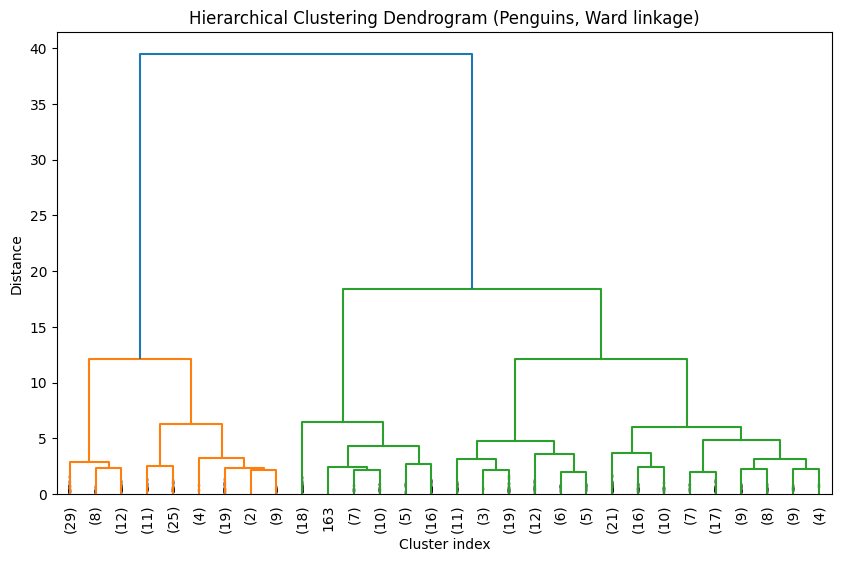

species     Adelie  Chinstrap  Gentoo
hc_cluster                           
1                0          0     119
2                0         57       0
3              146         11       0


In [13]:
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster


# Compute linkage matrix
Z = linkage(X_scaled, method="ward")

# Plot dendrogram
plt.figure(figsize=(10, 6))
dendrogram(
    Z,
    truncate_mode="lastp",  # show only last merges for readability
    p=30,                   # adjust number of leaf clusters shown
    leaf_rotation=90.,
    leaf_font_size=10.,
    show_contracted=True
)
plt.title("Hierarchical Clustering Dendrogram (Penguins, Ward linkage)")
plt.xlabel("Cluster index")
plt.ylabel("Distance")
plt.show()

# 5) Cut the tree to get 3 clusters
labels_k3 = fcluster(Z, t=3, criterion="maxclust")

# Add cluster labels to dataframe
penguins["hc_cluster"] = labels_k3

# Compare with actual species
print(pd.crosstab(penguins["hc_cluster"], penguins["species"]))

# **Clustering: DBSCAN**

/tmp/ipython-input-2250730896.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Cluster"] = labels


   bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g  Cluster
0            39.1           18.7              181.0       3750.0        0
1            39.5           17.4              186.0       3800.0        0
2            40.3           18.0              195.0       3250.0        0
4            36.7           19.3              193.0       3450.0        0
5            39.3           20.6              190.0       3650.0        0


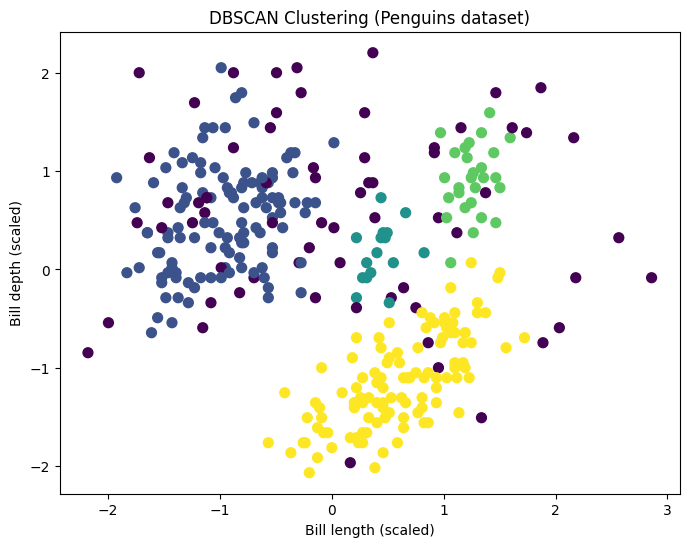

In [14]:
from sklearn.cluster import DBSCAN

# Apply DBSCAN
db = DBSCAN(eps=0.5, min_samples=5)
labels = db.fit_predict(X_scaled)

# Add cluster labels to dataframe
X["Cluster"] = labels
print(X.head())

# Plot clusters (first 2 features only for visualization)
plt.figure(figsize=(8,6))
plt.scatter(X_scaled[:,0], X_scaled[:,1], c=labels, cmap="viridis", s=50)
plt.title("DBSCAN Clustering (Penguins dataset)")
plt.xlabel("Bill length (scaled)")
plt.ylabel("Bill depth (scaled)")
plt.show()